# Analyze staffing at Allegheny County's 911 call center

In [1]:
import pandas as pd

### Import 2016-22 salary information

In [2]:
df = pd.DataFrame(columns=['JOB_TITLE', 'REGULAR_PAY', 'OVERTIME_PAY', 'YEAR'])

In [3]:
for year in [2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    yeardf = pd.read_csv('input/salary%i.csv' % year)
    yeardf = yeardf[['JOB_TITLE', 'REGULAR_PAY', 'OVERTIME_PAY']]
    yeardf['YEAR'] = year

    if year == 2022:
        yeardf['REGULAR_PAY'] = yeardf.REGULAR_PAY.str.replace(r'\s+-\s+', '0', regex=True)
        yeardf['OVERTIME_PAY'] = yeardf.OVERTIME_PAY.str.replace(r'\s+-\s+', '0', regex=True)

        yeardf['REGULAR_PAY'] = pd.to_numeric(yeardf.REGULAR_PAY.str.replace(',', ''))
        yeardf['OVERTIME_PAY'] = pd.to_numeric(yeardf.OVERTIME_PAY.str.replace(',', ''))

    df = pd.concat([df, yeardf])

### Restrict to specific call center job titles

In [4]:
df = df[
    df.JOB_TITLE.isin(['TELECOMMUNICATION OFFICER', 'SHIFT COMMANDER'])
]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 12 to 6256
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JOB_TITLE     2076 non-null   object 
 1   REGULAR_PAY   2076 non-null   float64
 2   OVERTIME_PAY  2076 non-null   float64
 3   YEAR          2076 non-null   object 
dtypes: float64(2), object(2)
memory usage: 81.1+ KB


### Graph overtime, regular pay

In [6]:
overtime = pd.pivot_table(df, columns='YEAR', values='OVERTIME_PAY', index='JOB_TITLE', aggfunc='sum')
overtime.to_csv('output/overtime.csv')
overtime

YEAR,2016,2017,2018,2019,2020,2021,2022
JOB_TITLE,,,,,,,
SHIFT COMMANDER,86667.47,109058.30,122264.22,58986.73,36721.35,95032.47,165359.19
TELECOMMUNICATION OFFICER,2600408.13,2686793.05,2867767.63,2873678.68,3411587.63,3084773.05,6073203.87


<Axes: xlabel='YEAR'>

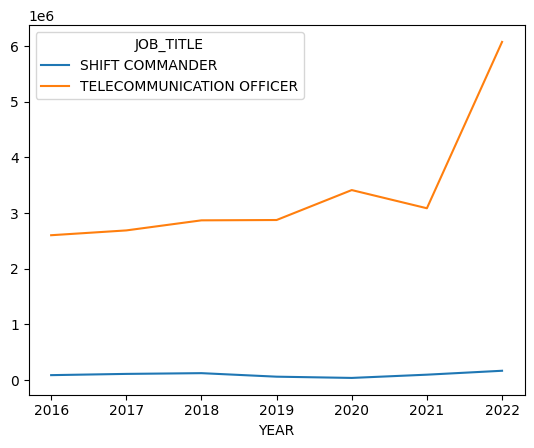

In [7]:
overtime.transpose().plot()

<Axes: xlabel='YEAR'>

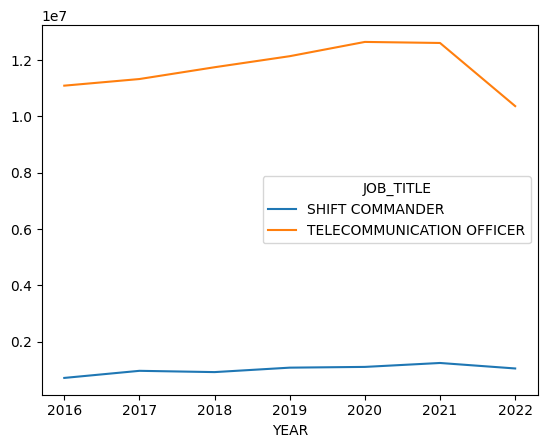

In [8]:
pd.pivot_table(df, columns='YEAR', values='REGULAR_PAY', index='JOB_TITLE', aggfunc='sum').transpose().plot()